# Analysis: Random Forest
**Primary Analyst:** Alvin Jeffery

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing, model_selection
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, roc_auc_score

## Load Data

In [ ]:
import pickle

with open("../data/data.pkl", "rb") as f:
    y_train, X_train, y_valid, X_valid, y_test, X_test = pickle.load(f) 

## Coerce Categories (`sex` and `race`)

In [1]:
X_train = pd.get_dummies(X_train, columns=['sex', 'race'])
X_train.head()

NameError: name 'pd' is not defined

In [2]:
df = pd.read_csv('../data/merged.csv')

In [3]:
df.shape

(21133, 109)

In [4]:
len(np.unique(df.ruid))

5651

In [5]:
df.head()

,ruid,visit_id,admit_date,discharge_date,stay_length,n_transfers,readmit_time,readmit_30d,sex,dob,...,pcv,plt-ct,systolic,diastolic,bmi,pregnancy_indicator,egfr,age,total_encounters,group
0,50135262,0,2007-02-08,2007-02-12,4,2,172 days 00:00:00.000000000,0,F,1949-09-20,...,32.0,334.0,140.0,58.0,44.710,0.0,123.677830,57.385352,10,train
1,50135262,1,2007-08-03,2007-08-06,3,3,22 days 00:00:00.000000000,1,F,1949-09-20,...,39.0,291.5,121.0,61.0,45.025,0.0,89.505000,57.867214,10,train
2,50135262,2,2007-08-28,2007-08-29,1,1,179 days 00:00:00.000000000,0,F,1949-09-20,...,38.0,308.0,131.0,60.0,46.230,0.0,107.450000,57.935661,10,train
3,50135262,3,2008-02-24,2008-02-28,4,2,44 days 00:00:00.000000000,0,F,1949-09-20,...,38.0,274.0,151.0,74.0,47.140,0.0,73.010770,58.428474,10,train
4,50135262,4,2008-04-12,2008-04-13,1,1,928 days 00:00:00.000000000,0,F,1949-09-20,...,36.0,330.0,134.0,66.0,47.360,0.0,84.358415,58.559890,10,train


In [6]:
df.head()

,ruid,visit_id,admit_date,discharge_date,stay_length,n_transfers,readmit_time,readmit_30d,sex,dob,...,pcv,plt-ct,systolic,diastolic,bmi,pregnancy_indicator,egfr,age,total_encounters,group
0,50135262,0,2007-02-08,2007-02-12,4,2,172 days 00:00:00.000000000,0,F,1949-09-20,...,32.0,334.0,140.0,58.0,44.710,0.0,123.677830,57.385352,10,train
1,50135262,1,2007-08-03,2007-08-06,3,3,22 days 00:00:00.000000000,1,F,1949-09-20,...,39.0,291.5,121.0,61.0,45.025,0.0,89.505000,57.867214,10,train
2,50135262,2,2007-08-28,2007-08-29,1,1,179 days 00:00:00.000000000,0,F,1949-09-20,...,38.0,308.0,131.0,60.0,46.230,0.0,107.450000,57.935661,10,train
3,50135262,3,2008-02-24,2008-02-28,4,2,44 days 00:00:00.000000000,0,F,1949-09-20,...,38.0,274.0,151.0,74.0,47.140,0.0,73.010770,58.428474,10,train
4,50135262,4,2008-04-12,2008-04-13,1,1,928 days 00:00:00.000000000,0,F,1949-09-20,...,36.0,330.0,134.0,66.0,47.360,0.0,84.358415,58.559890,10,train


## Preliminary Model

In [18]:
scorer = {'f1': make_scorer(f1_score)}
rf = RandomForestClassifier()

In [136]:
max_features = [5, 10, 15, 20]
n_estimators = [100, 500, 1000]

# Create the grid
parameter_grid = {'max_features': max_features, 
                  'n_estimators': n_estimators}

In [137]:
rf_cv = model_selection.GridSearchCV(estimator=rf, cv=5, n_jobs=3, param_grid=parameter_grid,
                                     scoring=scorer, refit='f1')

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_features': [5, 10, 15, 20], 'n_estimators': [100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring={'f1': make_scorer(f1_score)}, verbose=0)

In [138]:
rf_cv.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 20,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [139]:
rf_cv.best_score_

0.13599493920042263

In [140]:
predictions = rf_cv.best_estimator_.predict(X_valid)
f1_score(y_valid, predictions)

0.14526129317980513

In [141]:
roc_auc_score(y_valid, predictions)

0.5300071201242161

In [142]:
confusion_matrix(y_valid, predictions)

array([[2917,   72],
       [ 893,   82]])

In [25]:
rf = RandomForestClassifier(n_estimators=100, max_features=20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
predictions = rf.predict(X_valid)
f1_score(y_valid, predictions)

0.07943512797881731

In [27]:
roc_auc_score(y_valid, predictions)

0.5129224768940601

In [28]:
def feature_importance(rf, train, pred_cols):
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    predictors = train[pred_cols].columns
    X = train[pred_cols]

    # Print the feature ranking
    print("Feature ranking:")
    #for f in range(X.shape[1]): # all features
    for f in range(5): # top 5 only
        print("%d. %s (%f)" % (f + 1, predictors[indices[f]], importances[indices[f]]))
    
    return X, importances, std, predictors, indices

In [29]:
X.columns.shape

(101,)

Feature ranking:
1. age (0.031714)
2. bmi (0.025103)
3. plt-ct (0.025043)
4. pcv (0.023177)
5. egfr (0.023098)


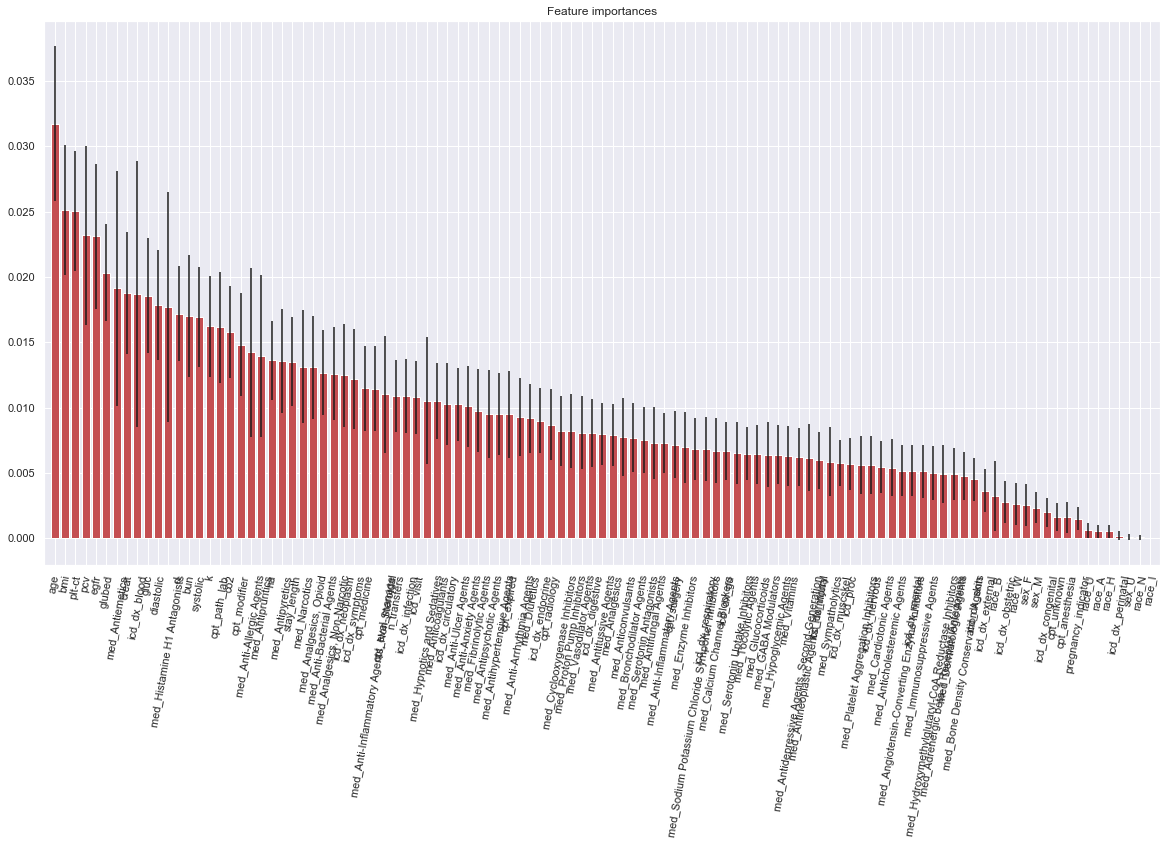

In [30]:
x, importances, std, predictors, indices = feature_importance(rf=rf, 
                                                                              train=X_train, 
                                                                              pred_cols=X_train.columns)

plt.figure(figsize=(20,10)); plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), predictors[indices], rotation=80); plt.xlim([-1, x.shape[1]])
plt.show()